In [1]:
import random
from dataclasses import asdict
from datetime import timedelta, datetime, date

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from src.stock_history.klines import KLinesStockHistory
from src.training.data_generation.config import DataGenerationConfig
from src.training.extractors.config import DataExtractionConfig
from src.training.extractors.klines_preparer import KLinesStockHistoryExtractor
from src.training.extractors.vision_binance_extractor import VisionBinanceExtractor
from src.training.position.short_position import ShortPositionParameters
from src.training.position.short_position_fabric import ShortPositionFabric


def daterange(start_date, end_date):
    current = start_date
    while current < end_date:
        yield current
        current = current + timedelta(days=1)


### Download

In [2]:
csv_filenames = []

binance_downloader = VisionBinanceExtractor(
    currency=DataExtractionConfig.CURRENCY,
    timestamp=DataExtractionConfig.TIMESTAMP,
)

for curr_date in daterange(DataExtractionConfig.START_DATE, DataExtractionConfig.END_DATE):
    print(curr_date)
    binance_downloader.download_file(report_date=curr_date)
    csv_filenames.append(
        binance_downloader.unzip_file(report_date=curr_date),
    )


2025-01-01 00:00:00
2025-01-02 00:00:00
2025-01-03 00:00:00
2025-01-04 00:00:00
2025-01-05 00:00:00
2025-01-06 00:00:00
2025-01-07 00:00:00
2025-01-08 00:00:00
2025-01-09 00:00:00
2025-01-10 00:00:00
2025-01-11 00:00:00
2025-01-12 00:00:00
2025-01-13 00:00:00
2025-01-14 00:00:00
2025-01-15 00:00:00
2025-01-16 00:00:00
2025-01-17 00:00:00
2025-01-18 00:00:00
2025-01-19 00:00:00
2025-01-20 00:00:00
2025-01-21 00:00:00
2025-01-22 00:00:00
2025-01-23 00:00:00
2025-01-24 00:00:00
2025-01-25 00:00:00
2025-01-26 00:00:00
2025-01-27 00:00:00
2025-01-28 00:00:00
2025-01-29 00:00:00
2025-01-30 00:00:00
2025-01-31 00:00:00
2025-02-01 00:00:00
2025-02-02 00:00:00
2025-02-03 00:00:00
2025-02-04 00:00:00
2025-02-05 00:00:00
2025-02-06 00:00:00
2025-02-07 00:00:00
2025-02-08 00:00:00
2025-02-09 00:00:00
2025-02-10 00:00:00
2025-02-11 00:00:00
2025-02-12 00:00:00
2025-02-13 00:00:00
2025-02-14 00:00:00
2025-02-15 00:00:00
2025-02-16 00:00:00
2025-02-17 00:00:00
2025-02-18 00:00:00
2025-02-19 00:00:00


In [3]:
csv_filenames

['data\\spot\\daily\\klines\\BTCUSDT\\1m\\BTCUSDT-1m-2025-01-01.csv',
 'data\\spot\\daily\\klines\\BTCUSDT\\1m\\BTCUSDT-1m-2025-01-02.csv',
 'data\\spot\\daily\\klines\\BTCUSDT\\1m\\BTCUSDT-1m-2025-01-03.csv',
 'data\\spot\\daily\\klines\\BTCUSDT\\1m\\BTCUSDT-1m-2025-01-04.csv',
 'data\\spot\\daily\\klines\\BTCUSDT\\1m\\BTCUSDT-1m-2025-01-05.csv',
 'data\\spot\\daily\\klines\\BTCUSDT\\1m\\BTCUSDT-1m-2025-01-06.csv',
 'data\\spot\\daily\\klines\\BTCUSDT\\1m\\BTCUSDT-1m-2025-01-07.csv',
 'data\\spot\\daily\\klines\\BTCUSDT\\1m\\BTCUSDT-1m-2025-01-08.csv',
 'data\\spot\\daily\\klines\\BTCUSDT\\1m\\BTCUSDT-1m-2025-01-09.csv',
 'data\\spot\\daily\\klines\\BTCUSDT\\1m\\BTCUSDT-1m-2025-01-10.csv',
 'data\\spot\\daily\\klines\\BTCUSDT\\1m\\BTCUSDT-1m-2025-01-11.csv',
 'data\\spot\\daily\\klines\\BTCUSDT\\1m\\BTCUSDT-1m-2025-01-12.csv',
 'data\\spot\\daily\\klines\\BTCUSDT\\1m\\BTCUSDT-1m-2025-01-13.csv',
 'data\\spot\\daily\\klines\\BTCUSDT\\1m\\BTCUSDT-1m-2025-01-14.csv',
 'data\\spot\\daily\

### CreatePosition

#### Read data


In [2]:
history_extractor = KLinesStockHistoryExtractor(
    currency=DataExtractionConfig.CURRENCY,
    timestamp=DataExtractionConfig.TIMESTAMP,
)

klines_window = KLinesStockHistory()

for curr_date in daterange(DataExtractionConfig.START_DATE_READ, DataExtractionConfig.END_DATE_READ):
    print(curr_date)
    klines_window = klines_window.concat(
        stock_history=history_extractor.extract_history(curr_date),
    )


2025-01-01
2025-01-02
2025-01-03
2025-01-04
2025-01-05
2025-01-06
2025-01-07
2025-01-08
2025-01-09
2025-01-10
2025-01-11
2025-01-12
2025-01-13
2025-01-14
2025-01-15
2025-01-16
2025-01-17
2025-01-18
2025-01-19
2025-01-20
2025-01-21
2025-01-22
2025-01-23
2025-01-24
2025-01-25
2025-01-26
2025-01-27
2025-01-28
2025-01-29
2025-01-30
2025-01-31
2025-02-01
2025-02-02
2025-02-03
2025-02-04
2025-02-05
2025-02-06
2025-02-07
2025-02-08
2025-02-09
2025-02-10
2025-02-11
2025-02-12
2025-02-13
2025-02-14
2025-02-15
2025-02-16
2025-02-17
2025-02-18
2025-02-19
2025-02-20
2025-02-21
2025-02-22
2025-02-23
2025-02-24
2025-02-25
2025-02-26
2025-02-27
2025-02-28
2025-03-01
2025-03-02
2025-03-03
2025-03-04
2025-03-05
2025-03-06
2025-03-07
2025-03-08
2025-03-09
2025-03-10
2025-03-11
2025-03-12
2025-03-13
2025-03-14
2025-03-15
2025-03-16
2025-03-17
2025-03-18
2025-03-19
2025-03-20
2025-03-21
2025-03-22
2025-03-23
2025-03-24
2025-03-25
2025-03-26
2025-03-27
2025-03-28
2025-03-29
2025-03-30
2025-03-31
2025-04-01

#### Create Short Position

In [3]:
assumed_price = 120_000  # BTC/USDT

parameters = ShortPositionParameters(
    qty=0.05,  # ~~ 110k * 0.05 / 10 = $500
    max_duration=timedelta(days=1, hours=0),
    stop_loss_pnl=25,  # QUOTE CURRENCY (USDT)
    take_profit_pnl=25,  # QUOTE CURRENCY (USDT)

    #### leverage - фиксируем
    leverage=10,
)

short_position_fabric = ShortPositionFabric(
    short_position_parameters=parameters,
    klines_history=klines_window,
)

short_position = short_position_fabric.open(
    start_datetime=datetime(year=2025, month=5, day=3, hour=6, minute=0),
)

short_position.estimate()

asdict(short_position.get_result())

{'pnl': np.float64(25.0),
 'duration': Timedelta('0 days 04:55:59.999999'),
 'start_datetime': datetime.datetime(2025, 5, 3, 6, 0),
 'target': 1,
 'margin': np.float64(482.00005),
 'roi': np.float64(0.051867214536596006),
 'entry_price': np.float64(96400.01),
 'buying_commission': np.float64(1.9179439999999999),
 'selling_commission': np.float64(1.9280002),
 'input_parameters': {'leverage': 10,
  'qty': 0.05,
  'max_duration': datetime.timedelta(days=1),
  'commission': 0.0004,
  'stop_loss_pnl': 25,
  'take_profit_pnl': 25,
  'stop_loss_roi': None,
  'take_profit_roi': None}}

##### Предварительная модель:

1. Торгуем с margin=$500

2. Желаемый roi=5%

3. Модель предсказания успеха рассчитывается как btc=0.05, ожидаемая прибыль 20 usdt, ожидаемая потеря 20 usdt

4. При такой настройке, нам нужно плечо 10, чтобы могли уложиться в margin = $500

In [4]:
14.917999999999301 / 192.80002

0.0773755106456903

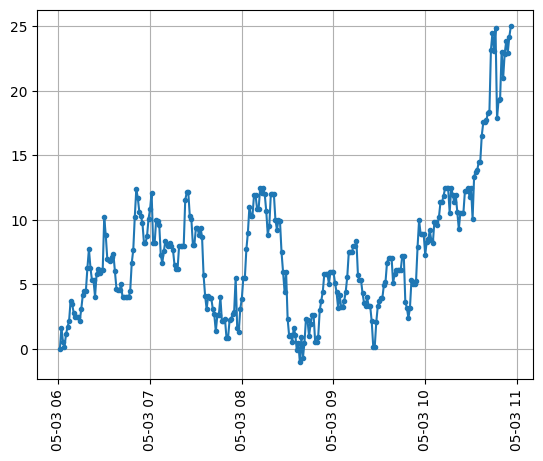

In [5]:
ax = plt.plot(
    short_position.close_datetime_logging,
    short_position.pnl_logging,
    marker='.',
)

plt.grid(True)
plt.tick_params(axis='x', rotation=90)

#### Generate samples

Алгоритм следующий:

1. Берем данные за 6 месяцев
2. Биткоин / ресемпл 1 минута
3. Каждый день выбираем случайно 100 точек по времени. Именно в это время будем входить с заданной позицией
4. Итого получается 18,000 наблюдений
5. random_seed = 2025

In [6]:
def random_datetime_from_date(input_date: date) -> datetime:
    # Start of the day
    start = datetime.combine(input_date, datetime.min.time())
    # Add random seconds from 0 to 86399 (23:59:59)
    random_seconds = random.randint(0, 86399)
    return start + timedelta(seconds=random_seconds)


In [ ]:
%%time

SAMPLE_COUNT_PER_DAY = 20

random.seed(2025)

parameters = ShortPositionParameters(
    leverage=10,
    qty=0.05,
    max_duration=timedelta(days=1, hours=0),
    stop_loss_pnl=40,  # QUOTE CURRENCY (USDT)
    take_profit_pnl=40,  # QUOTE CURRENCY (USDT)
)

short_position_fabric = ShortPositionFabric(
    short_position_parameters=parameters,
    klines_history=klines_window,
)

positions_logs = []

for curr_date in (daterange(DataGenerationConfig.START_DATE, DataGenerationConfig.END_DATE)):

    print(curr_date)

    for _ in range(SAMPLE_COUNT_PER_DAY):
        random_datetime = random_datetime_from_date(curr_date)

        short_position = short_position_fabric.open(
            start_datetime=random_datetime,
        )

        short_position.estimate()

        positions_logs.append(short_position)


2025-01-01
2025-01-02


In [35]:
len(positions_logs)

3620

In [36]:
positions = pd.DataFrame(asdict(item.get_result()) for item in positions_logs)

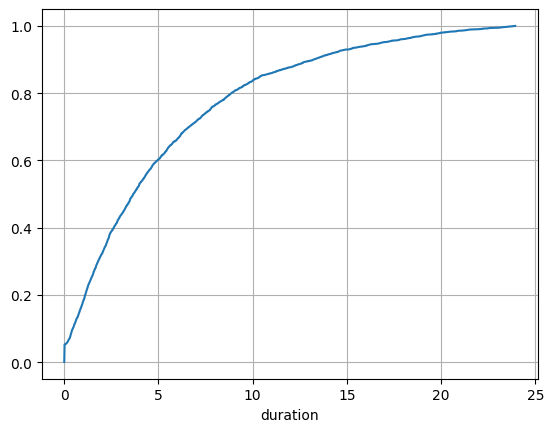

In [37]:
positions['duration'].dt.seconds.div(60 * 60).value_counts(1).sort_index().cumsum().plot(
    # marker='.',
)

plt.grid()

<Axes: >

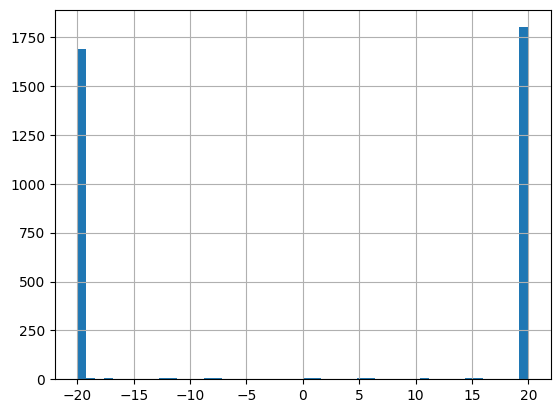

In [38]:
(
    positions
    .assign(
        pnl_custom=lambda item: np.maximum(np.minimum(item['pnl'], 20), -20),
    )
    ['pnl_custom']
    .hist(
        bins=50,
    )
)

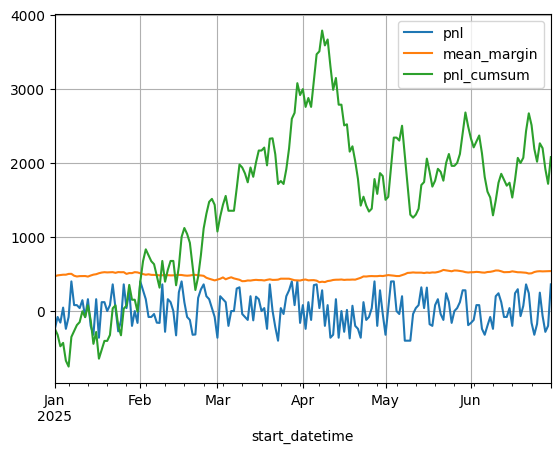

In [39]:
(
    positions
    .assign(
        pnl_custom=lambda item: np.maximum(np.minimum(item['pnl'], 20), -20),
    )
    .groupby([
        pd.Grouper(freq='1d', key='start_datetime'),
    ])
    .agg(
        pnl=pd.NamedAgg(column='pnl_custom', aggfunc=lambda item: item.sum()),
        mean_margin=pd.NamedAgg(column='margin', aggfunc=lambda item: item.mean()),
    )
    .assign(
        pnl_cumsum=lambda item: item['pnl'].cumsum(),
    )
    .plot()
)
plt.grid()

<Axes: >

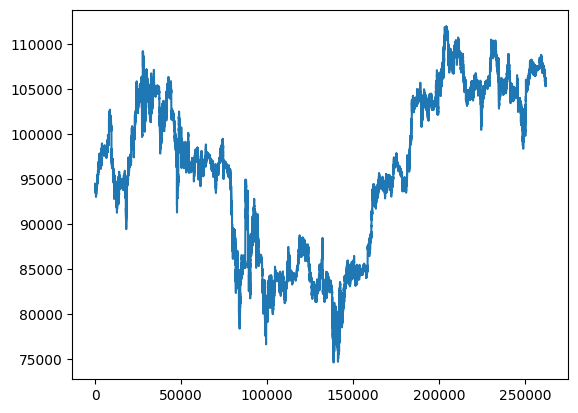

In [40]:
klines_window.get_window()['close'].reset_index(drop=True).plot()

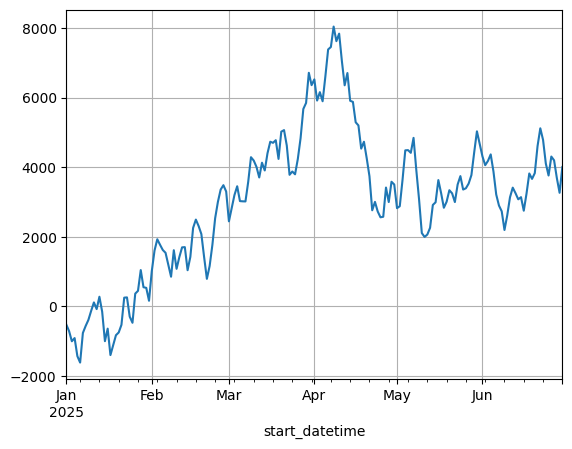

In [41]:
positions.groupby([
    pd.Grouper(freq='1d', key='start_datetime'),
])['pnl'].sum().cumsum().plot()

plt.grid()

In [33]:
positions['target'].value_counts(1)

target
1    0.51989
0    0.48011
Name: proportion, dtype: float64